In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

from sklearn import metrics

In [15]:
df = pd.read_csv(r"C:\Users\wendy\UW CS Graduate\CS581_Machine Learning\Assignments\HW2\SouthGermanCredit\SouthGermanCredit.asc", sep=" ")

In [16]:
print("The shape of the DataFrame is: {}".format(df.shape))

The shape of the DataFrame is: (1000, 21)


In [17]:
df.head(10)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
5,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
7,1,6,4,0,1361,1,2,2,3,1,...,1,40,3,2,1,2,1,1,1,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1


In [19]:
df = df.drop(['kredit'], axis = 'columns')

In [20]:
df.head(10)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1
5,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,4,1,39,3,2,2,2,2,1,1
7,1,6,4,0,1361,1,2,2,3,1,4,1,40,3,2,1,2,1,1,1
8,4,18,4,3,1098,1,1,4,2,1,4,3,65,3,2,2,1,2,1,2
9,2,24,2,3,3758,3,1,1,2,1,4,4,23,3,1,1,1,2,1,2


## K-means clustering with YellowBrick Elbow Method:

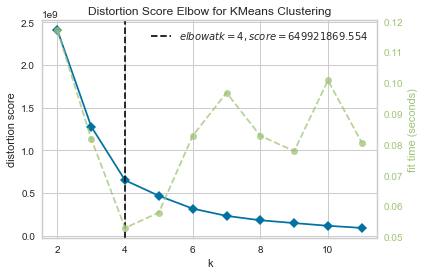

In [21]:
# Instantiate the clustering model and visualizer
model_km = KMeans()
kmVisualizer = KElbowVisualizer(model_km, k=(2,12))

kmVisualizer.fit(df)        # Fit the data to the visualizer
kmVisualizer.show()        # Finalize and render the figure

From the above Elbow Curve, we can see that the suggested k should be 4

## K-means clustering with YellowBrick Sihoutte Plots Method:

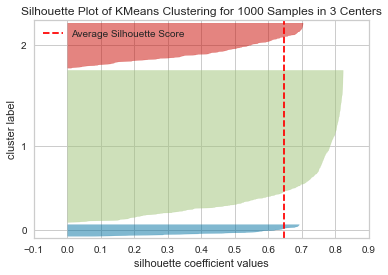

In [22]:
# Instantiate the clustering model and visualizer
model_km2 = KMeans(3)
slVisualizer = SilhouetteVisualizer(model_km2, colors='yellowbrick')

slVisualizer.fit(df)        # Fit the data to the visualizer
slVisualizer.show()        # Finalize and render the figure

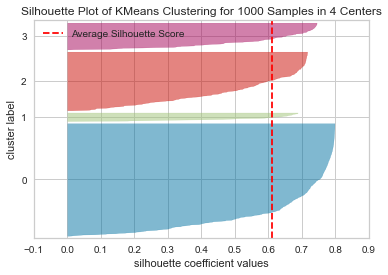

In [23]:
# Instantiate the clustering model and visualizer
model_km2 = KMeans(4)
slVisualizer = SilhouetteVisualizer(model_km2, colors='yellowbrick')

slVisualizer.fit(df)        # Fit the data to the visualizer
slVisualizer.show()        # Finalize and render the figure

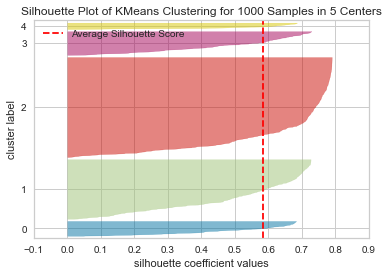

In [24]:
# Instantiate the clustering model and visualizer
model_km2 = KMeans(5)
slVisualizer = SilhouetteVisualizer(model_km2, colors='yellowbrick')

slVisualizer.fit(df)        # Fit the data to the visualizer
slVisualizer.show()        # Finalize and render the figure

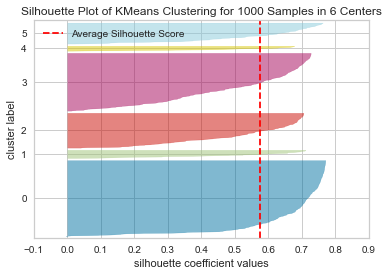

In [30]:
# Instantiate the clustering model and visualizer
model_km2 = KMeans(6)
slVisualizer = SilhouetteVisualizer(model_km2, colors='yellowbrick')

slVisualizer.fit(df)        # Fit the data to the visualizer
slVisualizer.show()        # Finalize and render the figure

From the above graph, we can see when k=3, the cluster2 is a lot more spread than the other 2 clusters, which probably indicates this cluster2 is actually consisted by more than 1 cluters. In addition, when k=4, k=5 and k=6, there is always one cluster that is a lot more dense than the other clusters. This indicates there probably is a cluster that is denser than the others. Moreover, when k=6, there are two small silhouette space which indicates these two dense clusters may actually be part of other clusters. In general the sihouette graph looks good when k=4 and k=5.

## K-means clustering with YellowBrick Intercluster Distance Method:

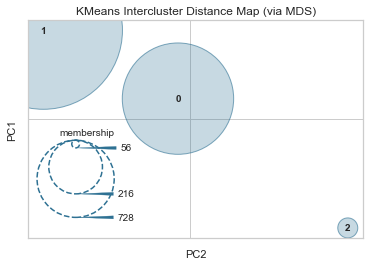

In [25]:
# Instantiate the clustering model and visualizer
model_km3 = KMeans(3)
icdVisualizer = InterclusterDistance(model_km3)

icdVisualizer.fit(df)        # Fit the data to the visualizer
icdVisualizer.show()        # Finalize and render the figure

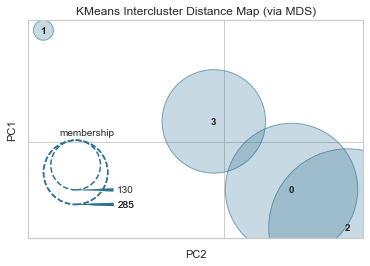

In [26]:
# Instantiate the clustering model and visualizer
model_km3 = KMeans(4)
icdVisualizer = InterclusterDistance(model_km3)

icdVisualizer.fit(df)        # Fit the data to the visualizer
icdVisualizer.show()        # Finalize and render the figure

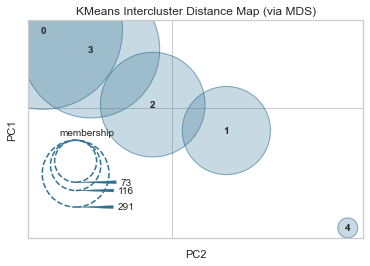

In [27]:
# Instantiate the clustering model and visualizer
model_km3 = KMeans(5)
icdVisualizer = InterclusterDistance(model_km3)

icdVisualizer.fit(df)        # Fit the data to the visualizer
icdVisualizer.show()        # Finalize and render the figure

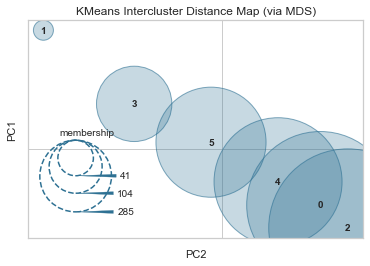

In [31]:
# Instantiate the clustering model and visualizer
model_km3 = KMeans(6)
icdVisualizer = InterclusterDistance(model_km3)

icdVisualizer.fit(df)        # Fit the data to the visualizer
icdVisualizer.show()        # Finalize and render the figure

From the above graph, we can see that there are always a small cluster that is very far from the other clusters. When k=4, there are two large clusters that are close to each other and a medium cluster that is at a medium distance from the two large clusters.